<a href="https://colab.research.google.com/github/MainN/diploma/blob/master/pystan/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pystan
import seaborn as sns
import pandas as pd
from math import exp, cos, pi, log

In [2]:
code='''
data {
    int i;
    vector[i] numbers;
    
}
parameters { 
    real slope;
    real intercept;
    real val;
    vector[i] res;
}
model {
    slope ~ normal(5,10);
    intercept ~ normal(0,10);
    val ~ inv_gamma (3,0.1);
    res ~ normal(numbers * slope + intercept,val);
}
'''
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_602b1d44e971d41161fa90292eaecee4 NOW.


In [8]:
data = dict( i=6,
            numbers=[1,2,3,4,5,6],

)
fit = sm.sampling(data=data, iter=1500, chains=1,thin=1)
op = fit.extract()  

In [11]:
print(op.keys())
print(len(op["slope"]))

odict_keys(['slope', 'intercept', 'val', 'res', 'lp__'])
750


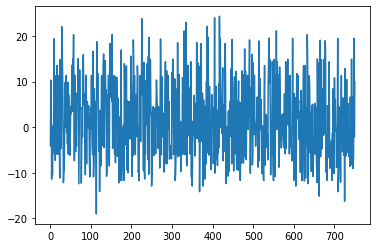

In [12]:
sns.lineplot(x=range(1,751),y=op['slope'])

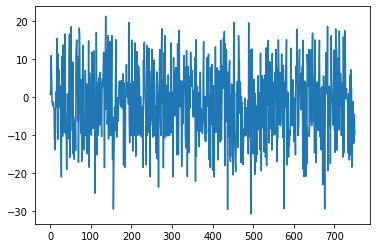

In [15]:
sns.lineplot(x=range(1,751),y=op['intercept'])

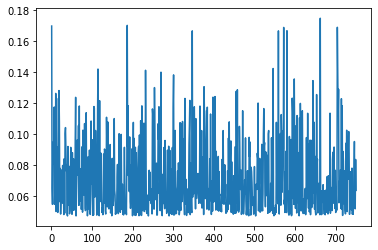

In [17]:
sns.lineplot(x=range(1,751),y=op['val'])